In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
#from generate_simulation import *
import vclamp_evaluator_HMMtoHH as vcl_ev
import general_plotter as plotter
from generate_simulation import *
import eval_helper as eh
import curve_fitting as cf

#from deap import tools
evaluator = vcl_ev.Vclamp_evaluator_HMM('./csv_files/params_na12mut8st_mod_med.csv', 'Basis', 'na12mut8st', 'na16', objective_names=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope','tau0','peak_current','ttp','prst_act'])
cp_file = './cp.pkl'
channel_name = 'na12mut8st'

##RBS you now need to check in the evaluator that you call peak_amp and TTP with the right ranges: [13,36?]

--No graphics will be displayed.


In [2]:
initial_params_list = [
    4.584982656184167e+01,
    2.393541665657613e-02,
    1.440952344322651e-02,
    8.847609128769419e-02,
    1.980838207143563e+01,
    2.217709530008501e-02,
    5.650174488683913e-01,
    6.108403283302217e-02,
    7.181189201089192e+01,
    6.593790601261940e-02,
    7.531178253431512e-01,
    3.647978133116471e-02,
    2.830146966213825e+00,
    2.890045633775495e-01,
    6.960300544163878e-02,
    5.757824421450554e-01,
    1.628407420157048e+02,
    2.680107016756367e-02,
    10,
    10,
    8000,
    1,
    1
]

In [3]:
opt_data = pickle.load( open( cp_file, "rb" ) )

In [4]:
print(opt_data.keys())
hof = opt_data['halloffame']
log = opt_data['logbook']

dict_keys(['population', 'generation', 'parents', 'halloffame', 'history', 'logbook', 'rndstate'])


In [5]:
print(log)


gen	nevals	avg        	std        	min    	max        
1  	500   	1.35569e+06	3.53703e+06	121.954	2.92367e+07
2  	500   	1.27674e+06	3.26423e+06	89.026 	2.95915e+07
3  	500   	1.24993e+06	4.08548e+06	64.9182	2.92254e+07
4  	500   	1.27296e+06	4.4482e+06 	64.9182	2.84353e+07
5  	500   	1.05897e+06	4.1039e+06 	64.9182	2.98635e+07
6  	500   	1.21658e+06	4.46012e+06	55.0949	2.98635e+07
7  	500   	766743     	3.72576e+06	55.0949	3.01683e+07
8  	500   	687765     	3.55067e+06	56.0497	2.94775e+07
9  	500   	1.72972e+06	5.38992e+06	27.9633	2.9558e+07 
10 	500   	873968     	3.39302e+06	49.5589	2.88225e+07
11 	500   	1.35972e+06	3.9964e+06 	56.0497	2.79483e+07
12 	500   	475107     	2.25587e+06	45.4539	2.48096e+07
13 	500   	443852     	2.37549e+06	45.4539	2.90688e+07
14 	500   	512856     	2.69663e+06	45.4539	3.01145e+07
15 	500   	385137     	2.06896e+06	45.4539	2.39163e+07
16 	500   	298107     	1.92406e+06	16.8562	2.85388e+07
17 	500   	417150     	2.58558e+06	16.8562	2.95087e+07
18 	500   

In [6]:
def scale(val, src):
    """
    scale val in the 0,1 range when given lb and ub
    """
    return ((val - src[0]) / (src[1]-src[0])) 

In [7]:
csv_file = './csv_files/params_na12mut8st_mod_med.csv'

def get_place_in_range(opt_ps,csv_file,print_flg = False):
    p_names = []
    p_fact = []
    param_list = eh.read_params_range(csv_file)
    for ind,p_name in enumerate(param_list.keys()):
        tmp = param_list[p_name]
        lb = tmp[1]
        ub = tmp[2]
        fact = scale(opt_ps[ind],[lb,ub])
        p_names.append(p_name)
        p_fact.append(fact)
        if print_flg:
            print(f'{p_name} - lb:{lb} ub:{ub} val:{opt_ps[ind]} p:{fact}')
    return p_names,p_fact
    

In [8]:
best_hof = hof[0]
p = best_hof
print("Best params: " + str(best_hof))
print("[inact_err, act_err]: " + str(evaluator.evaluate_with_lists(best_hof)))
#print("Best invs list: " + str(best_indvs))

Best params: [415.3060311966126, 0.1330362098051713, 5.713416366966676, 0.03738519647014481, 92.09250007845431, 0.03096863788542676, 4.376936783804437, 4.7897982827323e-06, 317.5033074577033, 0.01456996659010159, 94.35299759910436, 4.197568076887603e-06, 1.157068242313551, 1.1254208357193987, 0.0801650756204292, 1.4494734632206356, 5472.451651621135, 0.06853252696136508, 13.163478214036742, -15.522428600797692, 31421.0467265569, 2.0093748012558383, 1.3090391730984106]
[inact_err, act_err]: (0.20506056316961468, 0.012827339918110246, 0.012960016097676014, 0.08369835033252745, 0.04003063335998698, 1.081250000000031, 0.04631983236549982, 0.037050407257824276)


In [9]:
pnames,pfactors = get_place_in_range(p,csv_file)

a1_0 - lb:0.0 ub:1000.0 val:415.3060311966126 p:0.4153060311966126
a1_1 - lb:0.0 ub:2.0 val:0.1330362098051713 p:0.06651810490258565
b1_0 - lb:0.0 ub:10.0 val:5.713416366966676 p:0.5713416366966676
b1_1 - lb:0.0 ub:0.4424 val:0.03738519647014481 p:0.08450541697591503
a2_0 - lb:0.0 ub:200.0 val:92.09250007845431 p:0.46046250039227155
a2_1 - lb:0.0 ub:0.1 val:0.03096863788542676 p:0.3096863788542676
b2_0 - lb:0.0 ub:10.0 val:4.376936783804437 p:0.4376936783804437
b2_1 - lb:0.0 ub:0.1 val:4.7897982827323e-06 p:4.7897982827323004e-05
a3_0 - lb:0.0 ub:359.0595 val:317.5033074577033 p:0.8842637709285042
a3_1 - lb:0.0 ub:0.3297 val:0.01456996659010159 p:0.04419158808038092
b3_0 - lb:0.0 ub:100.0 val:94.35299759910436 p:0.9435299759910436
b3_1 - lb:0.0 ub:0.1 val:4.197568076887603e-06 p:4.197568076887603e-05
bh_0 - lb:0.0 ub:4.0 val:1.157068242313551 p:0.28926706057838775
bh_1 - lb:0.0 ub:1.445 val:1.1254208357193987 p:0.7788379485947395
bh_2 - lb:0.0139 ub:0.348 val:0.0801650756204292 p:0.198

[Text(0, 0, 'a1_0'),
 Text(0, 1, 'a1_1'),
 Text(0, 2, 'b1_0'),
 Text(0, 3, 'b1_1'),
 Text(0, 4, 'a2_0'),
 Text(0, 5, 'a2_1'),
 Text(0, 6, 'b2_0'),
 Text(0, 7, 'b2_1'),
 Text(0, 8, 'a3_0'),
 Text(0, 9, 'a3_1'),
 Text(0, 10, 'b3_0'),
 Text(0, 11, 'b3_1'),
 Text(0, 12, 'bh_0'),
 Text(0, 13, 'bh_1'),
 Text(0, 14, 'bh_2'),
 Text(0, 15, 'ah_0'),
 Text(0, 16, 'ah_1'),
 Text(0, 17, 'ah_2'),
 Text(0, 18, 'vShift'),
 Text(0, 19, 'vShift_inact'),
 Text(0, 20, 'maxrate'),
 Text(0, 21, 'ahfactor'),
 Text(0, 22, 'bhfactor')]

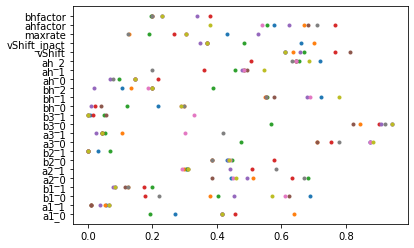

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
yaxis = range(len(pnames))
for p in hof[-10:-2]:
    pnames,pfactors = get_place_in_range(p,csv_file)
    ax.plot(pfactors,yaxis,'.')
pnames,pfactors = get_place_in_range(hof[0],csv_file,True)
ax.plot(pfactors,yaxis,'.')
ax.set_yticks(yaxis)
ax.set_yticklabels(pnames)


In [11]:
p = best_hof

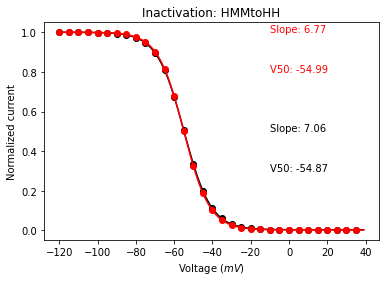

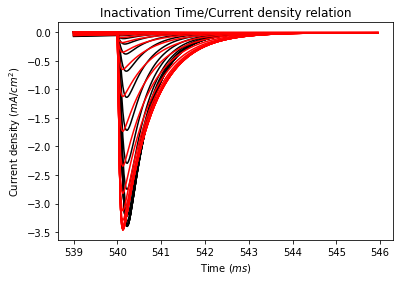

In [12]:
plotter.plot_inact(None, 'na16', False,p,'na12mut8st',True,"./Plots_Folder/jinan_testInact.pdf", "HMMtoHH")

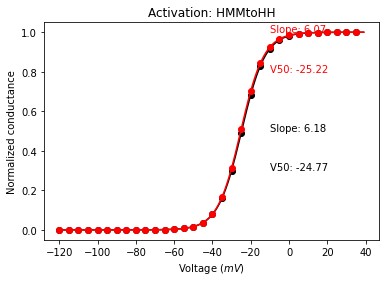

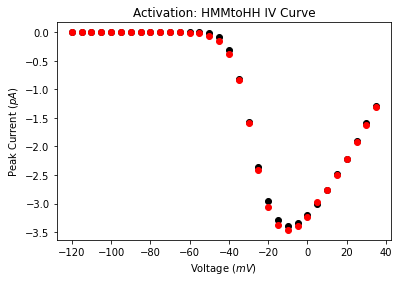

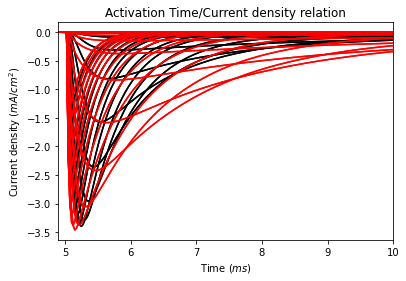

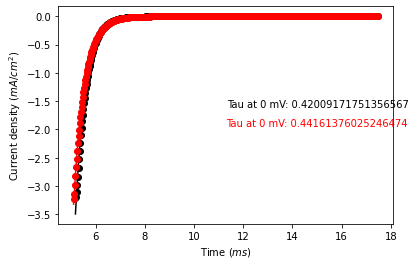

In [13]:
plotter.plot_act(None,'na16' , False,p,'na12mut8st',True,"./Plots_Folder/jinan_test.pdf", "HMMtoHH")

In [14]:
print(best_hof)

[415.3060311966126, 0.1330362098051713, 5.713416366966676, 0.03738519647014481, 92.09250007845431, 0.03096863788542676, 4.376936783804437, 4.7897982827323e-06, 317.5033074577033, 0.01456996659010159, 94.35299759910436, 4.197568076887603e-06, 1.157068242313551, 1.1254208357193987, 0.0801650756204292, 1.4494734632206356, 5472.451651621135, 0.06853252696136508, 13.163478214036742, -15.522428600797692, 31421.0467265569, 2.0093748012558383, 1.3090391730984106]


# Test HH Target data

In [15]:
wild_data = {}
# Getting objective base values for HH model.
is_HMM = False 
# Create genSim objects

act_obj = Activation_general(channel_name='na16')
tau0 = act_obj.get_Tau_0mV()
act_obj = Activation_general(channel_name='na16')
act_obj.genActivation()
peak_amp = act_obj.find_peak_amp([14, 33])
time_to_peak = act_obj.find_time_to_peak([14, 33])
#peak_amp = act_obj.find_peak_amp()
#time_to_peak = act_obj.find_time_to_peak()

prst_act = cf.calc_act_prst_curr(act_obj)
gv_slope, v_half_act, top, bottom = cf.calc_act_obj(act_obj)
inact_obj = Inactivation_general(channel_name='na16')
ssi_slope, v_half_inact, top, bottom = cf.calc_inact_obj(inact_obj)
wild_data['v_half_act'] = v_half_act
wild_data['gv_slope'] = gv_slope
wild_data['v_half_ssi'] = v_half_inact
wild_data['ssi_slope'] = ssi_slope
wild_data['tau0'] = tau0
wild_data['peak_amp'] = peak_amp
wild_data['time_to_peak'] = time_to_peak
wild_data['prst_act'] = prst_act
print(wild_data)



{'v_half_act': -24.766773949665836, 'gv_slope': 6.182889397919378, 'v_half_ssi': -54.87287065464149, 'ssi_slope': 7.058770252794946, 'tau0': 0.42009171751356567, 'peak_amp': [-0.0156116142392469, -0.08689641452307355, -0.31279869152835266, -0.81355296468319, -1.5702849387827609, -2.358331402478808, -2.9551794094406874, -3.2879612751395504, -3.398903176286063, -3.344838674282482, -3.2027341340615103, -2.998401814643222, -2.7660205398094537, -2.482249121696948, -2.2133286760570616, -1.9051071015409131, -1.597164948160441, -1.2957842129686206], 'time_to_peak': [5.950000000000051, 6.075000000000053, 5.800000000000049, 5.6500000000000465, 5.525000000000045, 5.425000000000043, 5.350000000000042, 5.300000000000042, 5.250000000000041, 5.2250000000000405, 5.17500000000004, 5.17500000000004, 5.150000000000039, 5.125000000000039, 5.125000000000039, 5.125000000000039, 5.100000000000039, 5.100000000000039], 'prst_act': -0.002081691514596226}


In [16]:
sf = evaluator.score_calculator
print(evaluator.wild_data)

{'v_half_act': -24.766773949665836, 'gv_slope': 6.182889397919378, 'v_half_ssi': -54.87287065464149, 'ssi_slope': 7.058770252794946, 'tau0': 0.42009171751356567, 'peak_amp': [-0.0156116142392469, -0.08689641452307355, -0.31279869152835266, -0.81355296468319, -1.5702849387827609, -2.358331402478808, -2.9551794094406874, -3.2879612751395504, -3.398903176286063, -3.344838674282482, -3.2027341340615103, -2.998401814643222, -2.7660205398094537, -2.482249121696948, -2.2133286760570616, -1.9051071015409131, -1.597164948160441, -1.2957842129686206], 'time_to_peak': [5.950000000000051, 6.075000000000053, 5.800000000000049, 5.6500000000000465, 5.525000000000045, 5.425000000000043, 5.350000000000042, 5.300000000000042, 5.250000000000041, 5.2250000000000405, 5.17500000000004, 5.17500000000004, 5.150000000000039, 5.125000000000039, 5.125000000000039, 5.125000000000039, 5.100000000000039, 5.100000000000039], 'prst_act': -0.002081691514596226}


# Test Scoring

In [17]:
errors = evaluator.evaluate_with_lists(best_hof)
print(errors)
print(sum(errors))

(0.20506056316961468, 0.012827339918110246, 0.012960016097676014, 0.08369835033252745, 0.04003063335998698, 1.081250000000031, 0.04631983236549982, 0.037050407257824276)
1.5191971425012705


In [18]:


objective_names=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope','tau0','peak_current','ttp','prst_act']
act_obj = Activation_general(channel_name='na12mut8st')
inact_obj = Inactivation_general(channel_name='na12mut8st')
param_values = best_hof
eh.change_params(param_values, scaled=False, is_HMM=True, sim_obj=act_obj)
eh.change_params(param_values, scaled=False, is_HMM=True, sim_obj=inact_obj)


In [19]:
sf.dv_half_act_diff
sf.gv_slope_diff

'100'

In [20]:
objectives=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope','tau0','peak_current','ttp','prst_act']
try:
    gv_slope, v_half_act, top, bottom = cf.calc_act_obj(act_obj)
    ssi_slope, v_half_inact, top, bottom = cf.calc_inact_obj(inact_obj)
    # y0, plateau, percent_fast, k_fast, k_slow = cf.calc_recov_obj(recov_obj)
    #print('gv_slope: ' + str(gv_slope))
    #print('v_half_act: ' + str(v_half_act))
    #print('ssi_slope: ' + str(ssi_slope))
    #print('v_half_inact: ' + str(v_half_inact))

except ZeroDivisionError:
    print('Zero Division Error************')
    error_val = []
    for i in range(len(objectives)):
        error_val.append(1000)


time_to_peak = act_obj.find_time_to_peak([14, 33])
peak_amp = act_obj.find_peak_amp([14, 33])
tau0 = act_obj.get_Tau_0mV()
prst_act = cf.calc_act_prst_curr(act_obj)
errors = []
if 'v_half_act' in objectives:
    vhalf_act_error = sf.dv_half_act(sf.dv_half_act_diff, v_half_act)
    errors.append(vhalf_act_error)
if 'gv_slope' in objectives:
    gv_slope_error = sf.gv_slope(sf.gv_slope_diff, gv_slope)
    errors.append(gv_slope_error)
if 'v_half_ssi' in objectives:
    v_half_ssi_error = sf.dv_half_ssi(sf.dv_half_ssi_diff, v_half_inact)
    errors.append(v_half_ssi_error)
if 'ssi_slope' in objectives:
    ssi_slope_error = sf.ssi_slope(sf.ssi_slope_diff, ssi_slope)
    errors.append(ssi_slope_error)
if 'peak_current' in objectives:
    peak_amp_errors = sf.calc_peak_amp_err(act_obj)
    errors.append(peak_amp_errors)
if 'ttp' in objectives:
    time_to_peak_error = sf.calc_ttp_err(act_obj)*10
    errors.append(time_to_peak_error)
if 'tau0' in objectives:
    tau0_error = sf.calc_tau0_err(act_obj)*100
    errors.append(tau0_error)
if 'prst_act' in objectives:
    prst_act_error = sf.calc_prst_act(act_obj)*1000000
    errors.append(prst_act_error)

In [21]:
print(len(time_to_peak))
print(len(peak_amp))
print(len(sf.time_to_peak_wild))


18
18
18


In [22]:
time_to_peak_error = np.sum([(time_to_peak[i] - sf.time_to_peak_wild[i])**2 for i in range(len(time_to_peak))])
print(time_to_peak_error)

0.10812500000000308


In [23]:
print(objective_names)
print(f" vhalf_act is: {v_half_act} WT:{wild_data['v_half_act']} error: {errors[0]}")
print(f" gv_slope is: {gv_slope} WT:{wild_data['gv_slope']} error: {errors[1]}")
print(f" v_half_ssi is: {v_half_inact} WT:{wild_data['v_half_ssi']} error: {errors[2]}")
print(f" ssi_slope is: {ssi_slope} WT:{wild_data['ssi_slope']} error: {errors[3]}")
print(f" peak_current is:\n {peak_amp} WT:\n{wild_data['peak_amp']} error: {errors[4]}")
print(f" ttp is:\n {time_to_peak} WT:\n{wild_data['time_to_peak']} error: {errors[5]}")
print(f" tau0 is: {tau0} WT:{wild_data['tau0']} error: {errors[6]}")
print(f" prst_act is: {prst_act} WT:{wild_data['prst_act']} error: {errors[7]}")


['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope', 'tau0', 'peak_current', 'ttp', 'prst_act']
 vhalf_act is: -25.21961008246623 WT:-24.766773949665836 error: 0.20506056316961468
 gv_slope is: 6.069631550870662 WT:6.182889397919378 error: 0.012827339918110246
 v_half_ssi is: -54.98671272110936 WT:-54.87287065464149 error: 0.012960016097676014
 ssi_slope is: 6.769463581021674 WT:7.058770252794946 error: 0.08369835033252745
 peak_current is:
 [-0.057743611739557596, -0.15107552267862376, -0.37403223785446654, -0.8364107553723454, -1.5823075991956719, -2.420329546071637, -3.051964716081655, -3.3743723725328914, -3.460500941276711, -3.3851000463518424, -3.2259662852908924, -2.975729311275041, -2.7654581741311492, -2.50720023060178, -2.224249090914311, -1.9292355130434733, -1.626189848369511, -1.3159377314653544] WT:
[-0.0156116142392469, -0.08689641452307355, -0.31279869152835266, -0.81355296468319, -1.5702849387827609, -2.358331402478808, -2.9551794094406874, -3.2879612751395504, -3.398

In [24]:
np.sum([(time_to_peak[i] - wild_data['time_to_peak'][i]) for i in range(len(peak_amp))])


-0.5250000000000075

In [25]:
print(act_obj.ipeak_vec)

[-3.1624866755917055e-08, -8.927607366586082e-08, -2.522897742254898e-07, -7.134091301325021e-07, -2.0177617044337223e-06, -5.705858295370398e-06, -1.6125171455351194e-05, -4.552159347855113e-05, -0.00012829817035428384, -0.0003607517078035097, -0.0010110328643470846, -0.002820263231649138, -0.007813465593140707, -0.02142232364854378, -0.057743611739557596, -0.15107552267862376, -0.37403223785446654, -0.8364107553723454, -1.5823075991956719, -2.420329546071637, -3.051964716081655, -3.3743723725328914, -3.460500941276711, -3.3851000463518424, -3.2259662852908924, -2.975729311275041, -2.7654581741311492, -2.50720023060178, -2.224249090914311, -1.9292355130434733, -1.626189848369511, -1.3159377314653544, -3.2259662852908924, -3.2259662852908924]


In [26]:
cf.calc_act_obj(act_obj)

(6.069631550870662,
 -25.21961008246623,
 1.0000000000011688,
 -2.5067203694985743e-12)

In [27]:
print(act_obj.ipeak_vec[12])

-0.007813465593140707


In [28]:
i12 = act_obj.all_is[12]
print(i12[np.argmin(i12)])

-0.008640425440670896


In [29]:
print(act_obj.t_vec[np.argmin(i12)])

24.999999999999115


In [30]:
print(len(evaluator.wild_data['time_to_peak']))
print(evaluator.wild_data['time_to_peak'][14:33])

18
[5.125000000000039, 5.125000000000039, 5.100000000000039, 5.100000000000039]


In [31]:
print(best_hof)

[415.3060311966126, 0.1330362098051713, 5.713416366966676, 0.03738519647014481, 92.09250007845431, 0.03096863788542676, 4.376936783804437, 4.7897982827323e-06, 317.5033074577033, 0.01456996659010159, 94.35299759910436, 4.197568076887603e-06, 1.157068242313551, 1.1254208357193987, 0.0801650756204292, 1.4494734632206356, 5472.451651621135, 0.06853252696136508, 13.163478214036742, -15.522428600797692, 31421.0467265569, 2.0093748012558383, 1.3090391730984106]


In [32]:
act_obj = Activation_general(channel_name='na12mut8st')
act_obj.genActivation()
time_to_peak = act_obj.find_time_to_peak([14,33])
time_to_peak_error = np.sum([np.abs(time_to_peak[i] - wild_data['time_to_peak'][i]) for i in range(len(peak_amp))])

In [33]:
print(time_to_peak)

[5.250000000000041, 5.250000000000041, 5.250000000000041, 5.250000000000041, 5.2250000000000405, 5.20000000000004, 5.17500000000004, 5.150000000000039, 5.150000000000039, 5.125000000000039, 5.125000000000039, 5.100000000000039, 5.100000000000039, 5.100000000000039, 5.100000000000039, 5.100000000000039, 5.075000000000038, 5.075000000000038]


In [34]:
print(evaluator.wild_data['time_to_peak'])


[5.950000000000051, 6.075000000000053, 5.800000000000049, 5.6500000000000465, 5.525000000000045, 5.425000000000043, 5.350000000000042, 5.300000000000042, 5.250000000000041, 5.2250000000000405, 5.17500000000004, 5.17500000000004, 5.150000000000039, 5.125000000000039, 5.125000000000039, 5.125000000000039, 5.100000000000039, 5.100000000000039]


In [35]:
act_obj = Activation_general(channel_name='na12mut8st')
eh.change_params(param_values, scaled=False, is_HMM=True, sim_obj=act_obj)
act_obj.clamp(0)

In [36]:
act_obj.find_ipeaks()

(-3.2259662852908924, 5.100000000000039, 204)

In [37]:
from generate_simulation import *
act_obj = Activation_general(channel_name='na12mut8st')
act_obj.genActivation()
import general_plotter as plotter

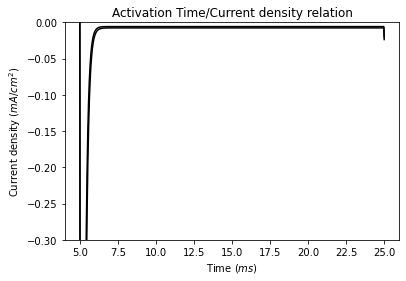

In [38]:
plotter.plot_currents_general(act_obj,time_range = [5,25],v_range = [0,5],i_range = [-0.3,0])


In [39]:
print(act_obj.all_is[0])

[-1.51121874e-09 -1.46530585e-09 -1.46130768e-09 ... -1.45712782e-09
 -1.45712782e-09 -1.45712782e-09]


In [40]:
v_mask = list(np.where(np.logical_and(act_obj.v_vec >= -10, act_obj.v_vec <=10))[0])

In [41]:
print(v_mask)

[22, 23, 24, 25, 26]


In [42]:
zero_ind = np.where(act_obj.v_vec == 0)[0][0]

In [43]:
print(zero_ind)

24
